# Lifetime of the excited state

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from modules import utils
import pandas as pd
import ast
import scipy as sp
from matplotlib import cm
from functools import partial
from typing import Literal

OUT_PATHS = {
    'figs_dir' : './figures',
    'results_dir' : './results',
}
IN_PATHS = {
    'black_body_dir' : './raw_data/Black_Body_Radiation',
    'na_dir' : './raw_data/Na_Spectrum',
    'ruby_dir' : './raw_data/Ruby_Spectrum',
    'laser_dir' : './raw_data/Laser_Spectrum',
}

# default figure settings
FIG_SIZE = np.array([6.4, 4]) # 16:10 aspect ratio
SAVE_FIG = True
FIG_FMT = 'pdf'
TRANSPARENT_PNG=True

# setting up stuff
savefig = partial(utils.save_fig, fig_dir=OUT_PATHS['figs_dir'], fig_fmt=FIG_FMT, fig_size=FIG_SIZE, save=SAVE_FIG, transparent_png=TRANSPARENT_PNG)
utils.check_paths(IN_PATHS, OUT_PATHS)

plt.close('all')

In [190]:
import ast

files = utils.getFiles('Raw_Data\\Ruby_Spectrum')
files = [file for file in files if file.name.find('RbTR_') != -1]

def TRtoSeries(file):
    data = np.loadtxt(file, skiprows=9, delimiter=',', usecols=(0, 1, 2)).T
    
     # get the meta data
    tokens = file.name.removesuffix('.csv')
    tokens = tokens[:-14]
    meta = utils.token_parser(tokens)
    
    ser = pd.Series()
    ser['type'] = meta['type']
    ser['date'] = meta['date']
    ser['id'] = file.name[5:8]
    ser['t'] = data[0]
    ser['A'] = data[1]
    ser['B'] = data[2]
    ser['meta'] = str(meta)
    ser['temp'] = meta.get('temp')
    ser['lock freq'] = meta.get('lock freq')
    ser['pos'] = meta.get('pos')
    return ser

df = pd.DataFrame([TRtoSeries(file) for file in files])
df['temp'] = df['temp'].fillna('293K')
df[['type', 'id', 'date', 'temp', 'lock freq']]


,type,id,date,temp,lock freq
0,RbTR,000,20241114,293K,54Hz
1,RbTR,001,20241114,293K,54Hz
2,RbTR,002,20241114,293K,47Hz
3,RbTR,003,20241114,293K,59Hz
4,RbTR,004,20241114,293K,67Hz
5,RbTR,005,20241114,293K,47Hz
6,RbTR,006,20241114,77K,41Hz
7,RbTR,007,20241114,77K,47Hz
8,RbTR,008,20241114,77K,54Hz
9,RbTR,009,20241114,77K,59Hz


In [191]:
with plt.style.context(['seaborn-v0_8-colorblind', 'seaborn-v0_8-paper']):       
    fig, axs = plt.subplots(figsize=FIG_SIZE)
    df.apply(lambda x: plt.plot(x['t'], x['A']), axis = 1)

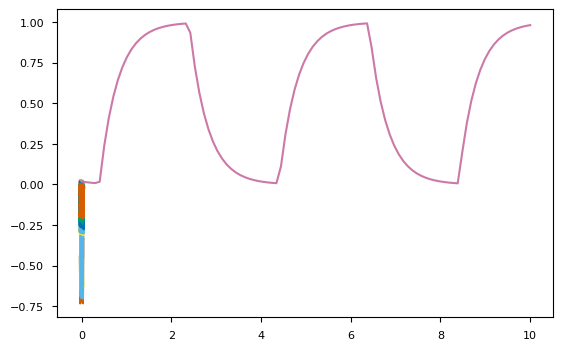

In [192]:
import numpy as np
import matplotlib.pyplot as plt
def expFlipFlop(t, tau, T):
    ''' 
    t: time in [s]
    tau: lifetime [s]
    T: window of periodicity [s]
    
    note: T should be the FULL period of the 
    square wave with 50% duty cycle
    '''
    
    Thalf = T / 2
    
    tstar = np.mod(t, Thalf)
    tprime = tau * np.log(1+np.exp(-Thalf / tau))
    
    widownum = np.floor_divide(t, Thalf)
    risingedg = np.remainder(widownum + 1, 2)
    fallingedg = np.remainder(widownum, 2)
    
    A = 1 - np.exp(-(Thalf + tprime)/ tau)
    
    rising = 1 - np.exp(- (tstar + tprime) * risingedg / tau)
    falling = A * np.exp(- tstar * fallingedg / tau)
              
    return rising * risingedg + falling * fallingedg


def expFlipFlop2(t, tau, tnot, T, A):
    return A * expFlipFlop(t - tnot, tau, T)

t = np.linspace(0,10,100)
A = expFlipFlop(t - 0.4, .4, 4)
plt.plot(t, A)

plt.show()

type                                                      RbTR
date                                                  20241114
id                                                         011
t            [-0.041475456, -0.041386752, -0.041298048, -0....
A            [-0.1373687, -0.1351878, -0.1309369, -0.123434...
B            [-0.03330886, -0.03331904, -0.03332992, -0.033...
meta         {'type': 'RbTR', 'id': '011', 'lock freq': '77...
temp                                                       77K
lock freq                                                 77Hz
pos                                                      6939A
Name: 11, dtype: object

[[Model]]
    Model(expFlipFlop2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4138
    # data points      = 1024
    # variables        = 4
    chi-square         = 0.04201157
    reduced chi-square = 4.1188e-05
    Akaike info crit   = -10335.7128
    Bayesian info crit = -10315.9869
    R-squared          = 0.92625626
[[Variables]]
    tau:   0.01083868 +/- 1.0063e-04 (0.93%) (init = 0.007)
    tnot:  0.02896000 +/- 1.9731e-05 (0.07%) (init = 0.01)
    T:     0.01294257 +/- 8.1254e-06 (0.06%) (init = 0.02)
    A:     0.26856269 +/- 4.0119e-04 (0.15%) (init = 0.7)
[[Correlations]] (unreported correlations are < 0.100)
    C(tnot, T)   = -0.5313
    C(tau, tnot) = -0.1953
    C(tau, A)    = +0.1622


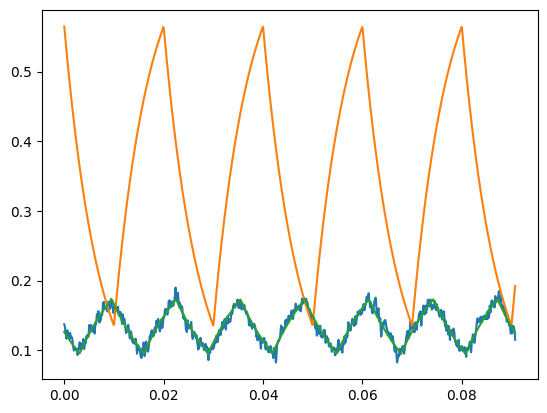

In [226]:
from lmfit.models import Model

batch = df.iloc[11]
display(batch)

# START FROM T=0
t = batch['t'] - batch['t'][0]
# negative tension
A = - batch['A']


model = Model(expFlipFlop2)
params = model.make_params()

params['A'].set(0.7, min = 0)
params['tau'].set(0.007, min = 0)
params['T'].set(0.02, min = 0)
params['tnot'].set(0.01)

result = model.fit(A, params, t=t)
print(result.fit_report())

plt.plot(t, A)
plt.plot(t, model.eval(params, t=t))
plt.plot(t, result.best_fit)
plt.show()

____________________________ 000 20241114 293K
[[Model]]
    Model(expFlipFlop2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 1024
    # variables        = 4
    chi-square         = 0.05009239
    reduced chi-square = 4.9110e-05
    Akaike info crit   = -10155.5667
    Bayesian info crit = -10135.8408
    R-squared          = 0.99866637
[[Variables]]
    tau:   0.00431185 +/- 7.3805e-06 (0.17%) (init = 0.007)
    tnot:  0.00976284 +/- 4.4437e-06 (0.05%) (init = 0.01)
    T:     0.01853714 +/- 3.4137e-06 (0.02%) (init = 0.02)
    A:     0.75973752 +/- 4.4714e-04 (0.06%) (init = 0.7)
____________________________ 001 20241114 293K
[[Model]]
    Model(expFlipFlop2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 1024
    # variables        = 4
    chi-square         = 0.06749708
    reduced chi-square = 6.6174e-05
    Akaike info crit   = -9850.19415
    Bayesian info crit 

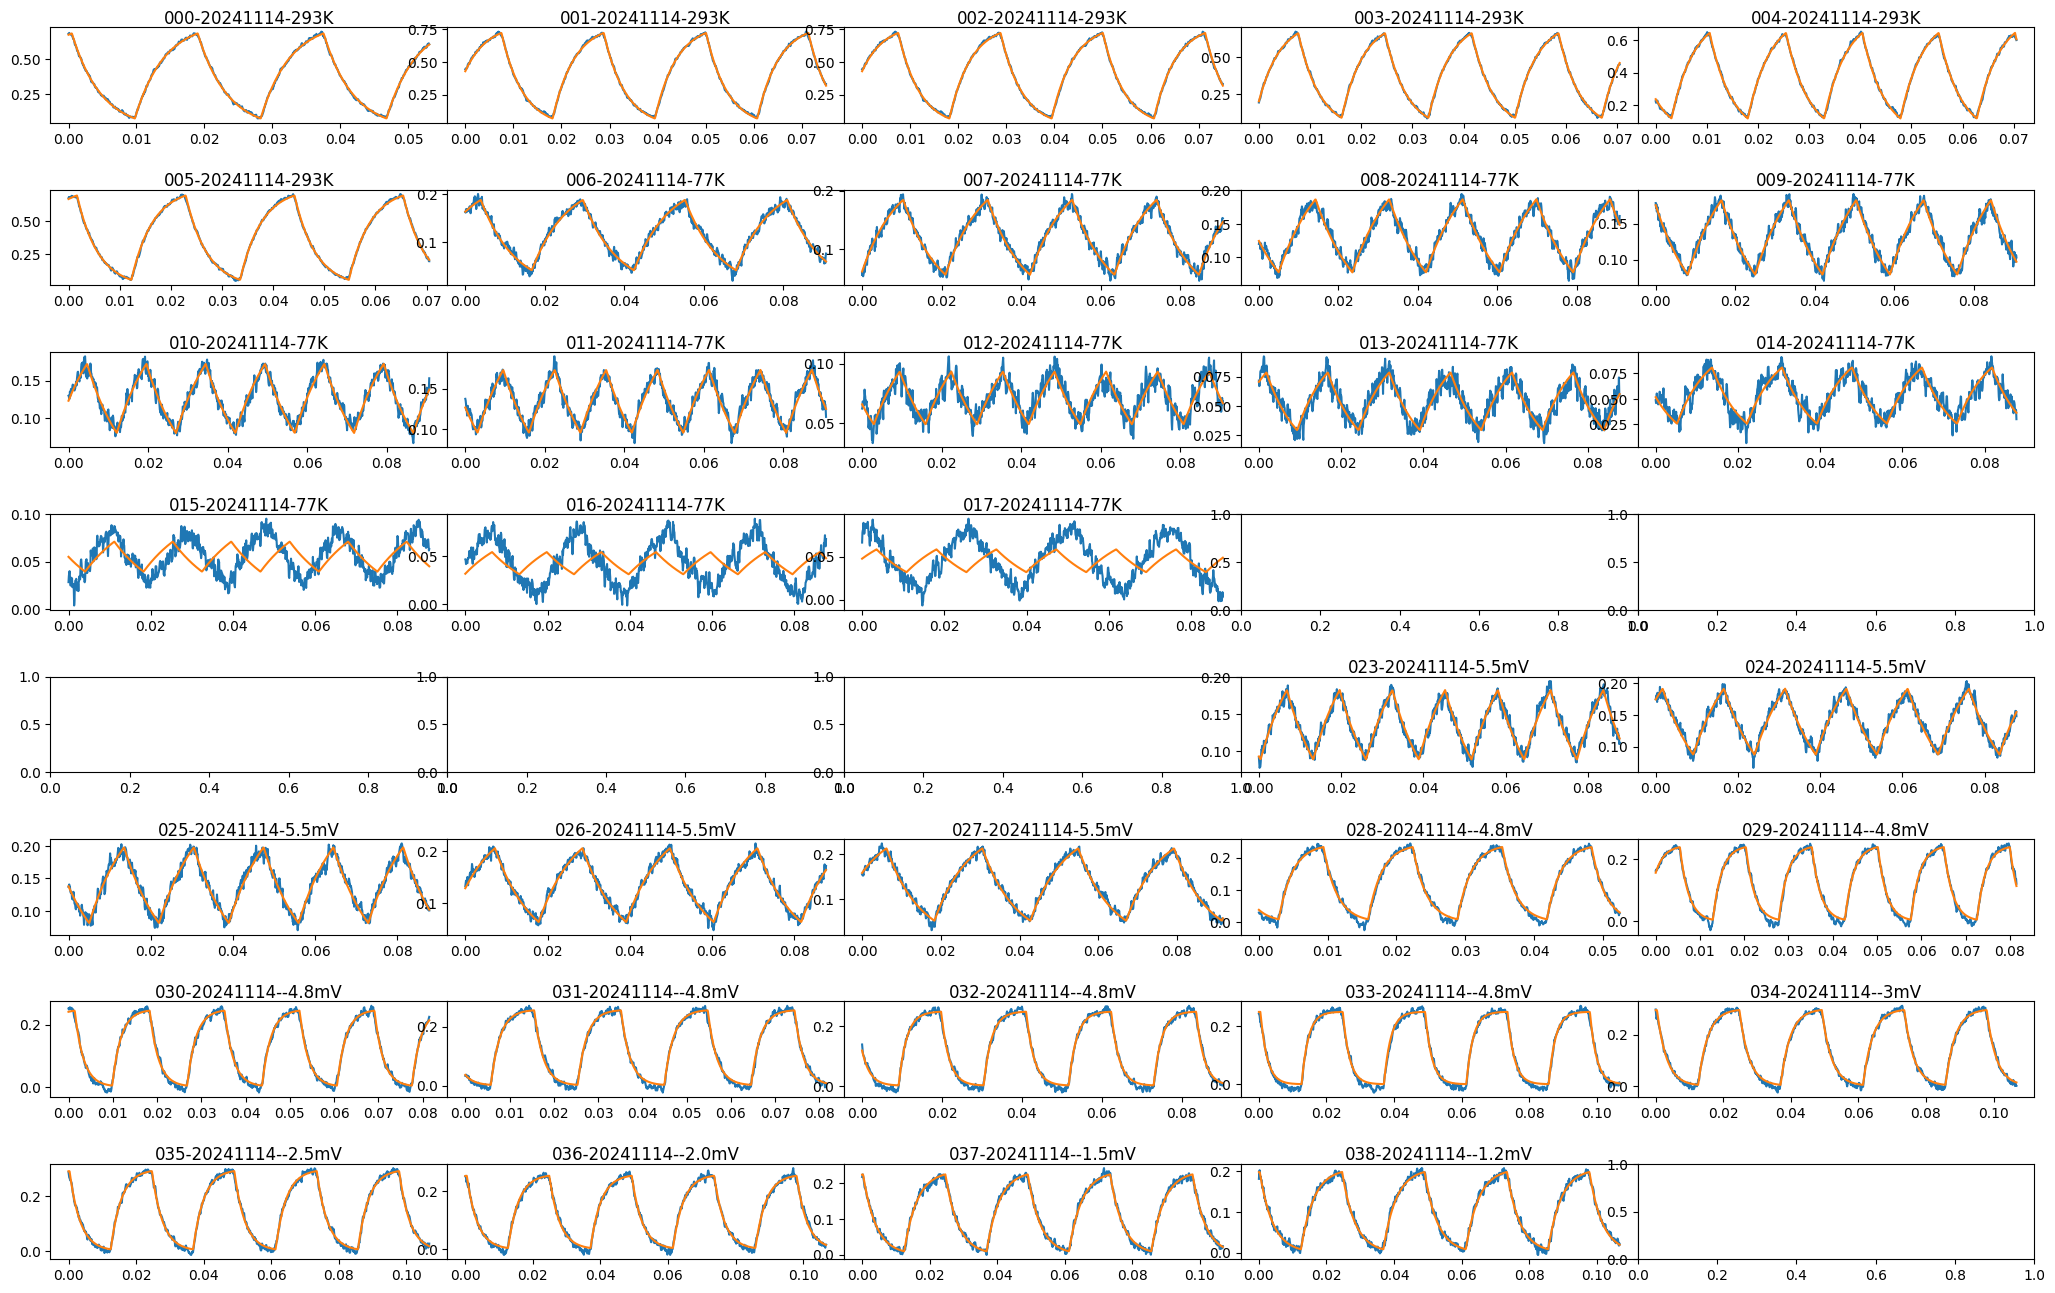

In [194]:

fig, axs = plt.subplots(8, 5, figsize = FIG_SIZE * 4)
axs = axs.flatten()
fig.subplots_adjust(hspace=.7, wspace=0)


  
# we took some batches at the 
# wrong wl, beacuse the peaks
# shift with temperature

mask = [not id in range(18,23) for id in df['id'].astype(int)]
df = df[mask]


result_df = pd.DataFrame()

for i, batch in df.iterrows():
    
    
    id, date, temp = batch[['id', 'date', 'temp']]
    print('____________________________', id, date, temp)

    # START FROM T=0
    t = batch['t'] - batch['t'][0]
    # negative tension
    A = - batch['A']

    params = model.make_params()

    params['A'].set(0.7, min = 0)
    params['tau'].set(0.007, min = 0.002, max = 0.012)
    params['T'].set(0.02, min = 0.01)
    params['tnot'].set(0.01)

    result = model.fit(A, params, t=t)
    
    # this fits do not converge well
    if int(id) in range(10,20):
        params['tnot'].set(0.024)
        params['T'].set(0.014)
        params['tau'].set(0.01)
        result = model.fit(A, params, t=t)
    
    if int(id) in range(15,25):
        params['tnot'].set(0.01)
        params['T'].set(0.014)
        params['tau'].set(0.0095)
        params['A'].set(0.27)
        result = model.fit(A, params, t=t)
    
    # if chi-square is too high the fit 
    # converged on flopflip insthead of 
    # flipflop
    if result.chisqr > 1:
        tnot = result.values['tnot']
        T = result.values['T']
        params['tnot'].set(tnot + T / 2)
        result = model.fit(A, params, t=t)
    
    if result.chisqr > 1:
        tnot = result.values['tnot']
        T = result.values['T']
        params['tnot'].set(tnot + T / 4)
        result = model.fit(A, params, t=t)
        
    print(result.fit_report(show_correl=False))

    axs[i].plot(t, A)
    #axs[i].plot(t, model.eval(params, t=t))
    axs[i].plot(t, result.best_fit)
    axs[i].set_title(f'{id}-{date}-{temp}', y = 0.95)
    
    # add to result_df
    batch['res'] = result
    result_df = pd.concat([result_df, batch[['id', 'date', 'temp', 'lock freq', 'pos', 'res']]], axis=1)

plt.show()
result_df = result_df.T.reset_index()

In [195]:
from modules.thermoc import thermocouple
# RUN THIS ONLY ONE TIME!!!

def toK(x):
    return thermocouple(tc_type='K', x=x, input_unit='mV', output_unit='K')

# remove non-convergent fits
ids = result_df['id'].astype(int)
mask = [not (id in range(15, 21)) for id in ids]
result_df = result_df[mask].reset_index(drop=True)

# convert the temp to kelvin
T = result_df['temp']
T[:15] = T[:15].apply(lambda x : float(x[:-1]))
T[15:] = T[15:].apply(lambda x : float(x[:-2]))
T[15:] = toK(-1*T[15:].to_numpy())

# lock freq to float
result_df['lock freq'] = result_df['lock freq'].apply(lambda x : float(x[:-2]))

# pos 
result_df['pos'].fillna('6933A', inplace=True)
result_df['pos'] = result_df['pos'].apply(lambda x : float(x[:-1]))

display(result_df)

C:\Users\alber\AppData\Local\Temp\ipykernel_17256\3040178307.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T[:15] = T[:15].apply(lambda x : float(x[:-1]))
C:\Users\alber\AppData\Local\Temp\ipykernel_17256\3040178307.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T[15:] = T[15:].apply(lambda x : float(x[:-2]))
C:\Users\alber\AppData\Local\Temp\ipykernel_17256\3040178307.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T

,index,id,date,temp,lock freq,pos,res
0,0,000,20241114,293.0,54.0,6933.0,<lmfit.model.ModelResult object at 0x000002D58...
1,1,001,20241114,293.0,54.0,6933.0,<lmfit.model.ModelResult object at 0x000002D58...
2,2,002,20241114,293.0,47.0,6933.0,<lmfit.model.ModelResult object at 0x000002D59...
3,3,003,20241114,293.0,59.0,6933.0,<lmfit.model.ModelResult object at 0x000002D59...
4,4,004,20241114,293.0,67.0,6933.0,<lmfit.model.ModelResult object at 0x000002D59...
5,5,005,20241114,293.0,47.0,6933.0,<lmfit.model.ModelResult object at 0x000002D58...
6,6,006,20241114,77.0,41.0,6939.0,<lmfit.model.ModelResult object at 0x000002D58...
7,7,007,20241114,77.0,47.0,6939.0,<lmfit.model.ModelResult object at 0x000002D59...
8,8,008,20241114,77.0,54.0,6939.0,<lmfit.model.ModelResult object at 0x000002D58...
9,9,009,20241114,77.0,59.0,6939.0,<lmfit.model.ModelResult object at 0x000002D59...


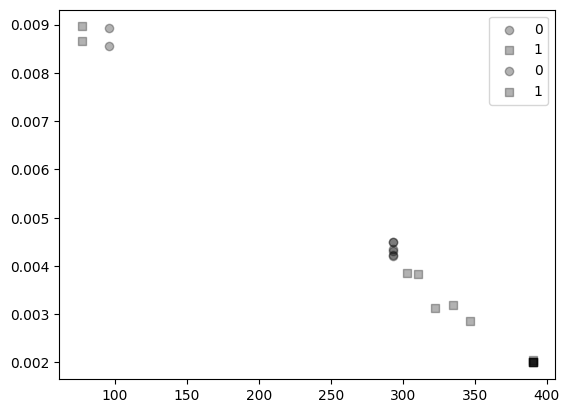

In [225]:
#mask = (result_df['lock freq'] > 40) & (result_df['lock freq'] < 50)
mask = (result_df['lock freq'] > 50) & (result_df['temp'] < 150)
mask = [not m for m in mask]

batch = result_df[mask]

tau = batch['res'].apply(lambda x : x.values['tau'])
std = batch['res'].apply(lambda x : x.params['tau'].stderr)
T = batch['temp']
pos = batch['pos'] / 10
chopper = batch['lock freq'] ** -1 / 2 



def get_marker(pos):
    if (pos == 693.9) or (pos == 695.5):
        return 1
    return 0

markers = ['o', 's', '^']
colors = []

for i in pos.unique():
    mask = pos == i
    
    marker = markers[get_marker(i)]

    plt.scatter(T[mask], tau[mask], alpha = 0.3, marker = marker, c = 'k', label = get_marker(i))
plt.legend()
plt.show()

In [197]:
import ast
merged = pd.merge(result_df, df, on = 'id')
clean_df = merged.apply(lambda x : pd.Series(ast.literal_eval(x['meta'])), axis = 1)

# remove wrong ids
clean_df = clean_df[clean_df['id'].astype(int) < 40] 

# convert T in kelvin
clean_df['temp'].fillna('293K', inplace=True)
def parseTemp(x):
    if x[-1] == 'K':
        return float(x[:-1])
    # the value is the K thermocouple
    # tension in mV
    return toK(float(x[:-2]))
clean_df['temp'] = clean_df['temp'].apply(parseTemp).astype(float)

# convert pos to nm
clean_df['pos'].fillna('6933A', inplace=True)
def parsePos(x):
    return float(x[:-1]) / 10
clean_df['pos'] = clean_df['pos'].apply(parsePos)

clean_df


C:\Users\alber\AppData\Local\Temp\ipykernel_17256\1459271019.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df['temp'].fillna('293K', inplace=True)
C:\Users\alber\AppData\Local\Temp\ipykernel_17256\1459271019.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

,PT tension,date,id,lock freq,pos,temp,type
1,800V,20241114,001,54Hz,693.3,293.000000,RbTR
2,800V,20241114,002,47Hz,693.3,293.000000,RbTR
3,800V,20241114,003,59Hz,693.3,293.000000,RbTR
4,800V,20241114,004,67Hz,693.3,293.000000,RbTR
5,800V,20241114,005,47Hz,693.3,293.000000,RbTR
6,900V,20241114,006,41Hz,693.9,77.000000,RbTR
7,900V,20241114,007,47Hz,693.9,77.000000,RbTR
8,900V,20241114,008,54Hz,693.9,77.000000,RbTR
9,900V,20241114,009,59Hz,693.9,77.000000,RbTR
10,900V,20241114,010,67Hz,693.9,77.000000,RbTR


In [198]:
from math import floor, log10

# add fit results
def parse_val_std(x, p):
    val = x.params[p].value
    std = x.params[p].stderr
    
    # two sig figs
    std = float(utils.display_sigfig(std, 2))
    order_of_magnitude = floor(log10(abs(std)))

    val /= pow(10, order_of_magnitude)
    val = round(val)
    val *= pow(10, order_of_magnitude)
    
    return f'{val} ± {std}'

def get_val_std(x):
    for p in ['tau', 'T', 'tnot', 'A']:
        x[p +'_val'] = x['res'].params[p].value
        x[p +'_std'] = x['res'].params[p].stderr
    return x
    
fir_res = merged.apply(get_val_std, axis=1)

to_keep = ['id','tau_val', 'tau_std', 'T_val', 'T_std', 'tnot_val', 'tnot_std', 'A_val', 'A_std']
fir_res = fir_res[to_keep]
fir_res

,id,tau_val,tau_std,T_val,T_std,tnot_val,tnot_std,A_val,A_std
0,000,0.004312,7.380473e-06,0.018537,0.000003,0.009763,0.000004,0.759738,0.000447
1,001,0.004496,9.182539e-06,0.021279,0.000003,0.018158,0.000006,0.790756,0.000501
2,002,0.004496,9.182539e-06,0.021279,0.000003,0.018158,0.000006,0.790756,0.000501
3,003,0.004228,7.605603e-06,0.016957,0.000002,0.016170,0.000004,0.750370,0.000437
4,004,0.004341,8.864219e-06,0.014923,0.000002,0.018006,0.000004,0.761730,0.000500
5,005,0.004196,8.964887e-06,0.021256,0.000004,0.012286,0.000006,0.746327,0.000508
6,006,0.008667,5.202018e-05,0.025694,0.000017,0.016740,0.000026,0.230327,0.000413
7,007,0.008962,5.707061e-05,0.021252,0.000013,-0.000277,0.000032,0.240450,0.000413
8,008,0.010477,7.746025e-05,0.018522,0.000013,0.004990,0.000034,0.263857,0.000434
9,009,0.010138,7.170005e-05,0.016949,0.000010,0.025020,0.000020,0.261668,0.000391


In [199]:
# add fit results
clean_df = clean_df.merge(fir_res, on = 'id')

# add fitted Hz
clean_df['fitted Hz'] = clean_df['T_val'] ** -1

order = ['type', 'id', 'date', 'temp', 'lock freq', 'fitted Hz', 'PT tension']
clean_df[order + to_keep]

,type,id,date,temp,lock freq,fitted Hz,PT tension,id,tau_val,tau_std,T_val,T_std,tnot_val,tnot_std,A_val,A_std
0,RbTR,001,20241114,293.000000,54Hz,46.993882,800V,001,0.004496,9.182539e-06,0.021279,0.000003,0.018158,0.000006,0.790756,0.000501
1,RbTR,002,20241114,293.000000,47Hz,46.993882,800V,002,0.004496,9.182539e-06,0.021279,0.000003,0.018158,0.000006,0.790756,0.000501
2,RbTR,003,20241114,293.000000,59Hz,58.973977,800V,003,0.004228,7.605603e-06,0.016957,0.000002,0.016170,0.000004,0.750370,0.000437
3,RbTR,004,20241114,293.000000,67Hz,67.010114,800V,004,0.004341,8.864219e-06,0.014923,0.000002,0.018006,0.000004,0.761730,0.000500
4,RbTR,005,20241114,293.000000,47Hz,47.044720,800V,005,0.004196,8.964887e-06,0.021256,0.000004,0.012286,0.000006,0.746327,0.000508
5,RbTR,006,20241114,77.000000,41Hz,38.919010,900V,006,0.008667,5.202018e-05,0.025694,0.000017,0.016740,0.000026,0.230327,0.000413
6,RbTR,007,20241114,77.000000,47Hz,47.055427,900V,007,0.008962,5.707061e-05,0.021252,0.000013,-0.000277,0.000032,0.240450,0.000413
7,RbTR,008,20241114,77.000000,54Hz,53.989844,900V,008,0.010477,7.746025e-05,0.018522,0.000013,0.004990,0.000034,0.263857,0.000434
8,RbTR,009,20241114,77.000000,59Hz,59.001868,900V,009,0.010138,7.170005e-05,0.016949,0.000010,0.025020,0.000020,0.261668,0.000391
9,RbTR,010,20241114,77.000000,67Hz,66.988577,900V,010,0.009696,8.059899e-05,0.014928,0.000009,0.027060,0.000020,0.252512,0.000415


In [200]:
# keep only the ones where the fitted Hz is close to the lock freq
clean_df['lock freq'] = clean_df['lock freq'].apply(lambda x : float(x[:-2]))
mask = (clean_df['lock freq'] - clean_df['fitted Hz']).abs() < 1
clean_df = clean_df[mask]
clean_df

,PT tension,date,id,lock freq,pos,temp,type,tau_val,tau_std,T_val,T_std,tnot_val,tnot_std,A_val,A_std,fitted Hz
1,800V,20241114,002,47.0,693.3,293.000000,RbTR,0.004496,9.182539e-06,0.021279,0.000003,0.018158,0.000006,0.790756,0.000501,46.993882
2,800V,20241114,003,59.0,693.3,293.000000,RbTR,0.004228,7.605603e-06,0.016957,0.000002,0.016170,0.000004,0.750370,0.000437,58.973977
3,800V,20241114,004,67.0,693.3,293.000000,RbTR,0.004341,8.864219e-06,0.014923,0.000002,0.018006,0.000004,0.761730,0.000500,67.010114
4,800V,20241114,005,47.0,693.3,293.000000,RbTR,0.004196,8.964887e-06,0.021256,0.000004,0.012286,0.000006,0.746327,0.000508,47.044720
6,900V,20241114,007,47.0,693.9,77.000000,RbTR,0.008962,5.707061e-05,0.021252,0.000013,-0.000277,0.000032,0.240450,0.000413,47.055427
7,900V,20241114,008,54.0,693.9,77.000000,RbTR,0.010477,7.746025e-05,0.018522,0.000013,0.004990,0.000034,0.263857,0.000434,53.989844
8,900V,20241114,009,59.0,693.9,77.000000,RbTR,0.010138,7.170005e-05,0.016949,0.000010,0.025020,0.000020,0.261668,0.000391,59.001868
9,900V,20241114,010,67.0,693.9,77.000000,RbTR,0.009696,8.059899e-05,0.014928,0.000009,0.027060,0.000020,0.252512,0.000415,66.988577
10,900V,20241114,011,77.0,693.9,77.000000,RbTR,0.010839,1.006286e-04,0.012943,0.000008,0.028960,0.000020,0.268563,0.000401,77.264404
12,900V,20241114,013,67.0,692.2,77.000000,RbTR,0.007582,1.175348e-04,0.014939,0.000017,0.024241,0.000038,0.107941,0.000405,66.938963


,PT tension,date,id,lock freq,pos,temp,type,tau_val,tau_std,T_val,T_std,tnot_val,tnot_std,A_val,A_std,fitted Hz
1,800V,20241114,002,47.0,693.3,293.000000,RbTR,0.004496,0.000009,0.021279,0.000003,0.018158,0.000006,0.790756,0.000501,46.993882
2,800V,20241114,003,59.0,693.3,293.000000,RbTR,0.004228,0.000008,0.016957,0.000002,0.016170,0.000004,0.750370,0.000437,58.973977
3,800V,20241114,004,67.0,693.3,293.000000,RbTR,0.004341,0.000009,0.014923,0.000002,0.018006,0.000004,0.761730,0.000500,67.010114
4,800V,20241114,005,47.0,693.3,293.000000,RbTR,0.004196,0.000009,0.021256,0.000004,0.012286,0.000006,0.746327,0.000508,47.044720
12,900V,20241114,013,67.0,692.2,77.000000,RbTR,0.007582,0.000118,0.014939,0.000017,0.024241,0.000038,0.107941,0.000405,66.938963
13,900V,20241114,014,59.0,692.2,77.000000,RbTR,0.007424,0.000115,0.017031,0.000022,0.022224,0.000044,0.106222,0.000436,58.716033
14,900V,20241114,023,77.0,694.0,407.383097,RbTR,0.008901,0.000067,0.012832,0.000006,0.013232,0.000020,0.271066,0.000385,77.928533
15,900V,20241114,024,67.0,694.0,407.383097,RbTR,0.009546,0.000068,0.014904,0.000008,0.009138,0.000024,0.278602,0.000401,67.097580
16,900V,20241114,025,59.0,694.0,407.383097,RbTR,0.009519,0.000068,0.016978,0.000011,0.022018,0.000021,0.278752,0.000442,58.899040
17,900V,20241114,026,47.0,694.0,407.383097,RbTR,0.008930,0.000050,0.021289,0.000012,0.017858,0.000021,0.268805,0.000402,46.972078


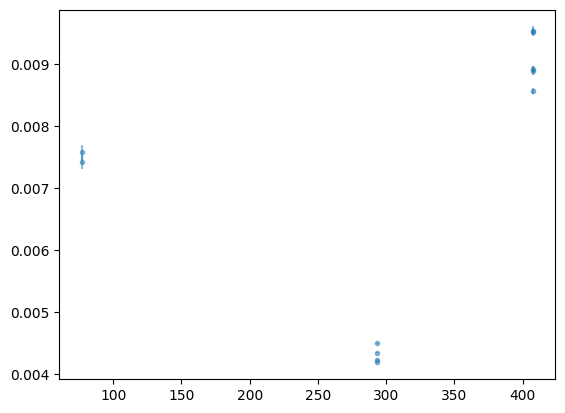

In [201]:
# select only the data of the first peak

# rt peak
ids = list(range(2, 6))

# 77K peak
ids = ids + list(range(12, 18))

# 300K peak
ids = ids + list(range(23, 28))

first_peak_df = clean_df[clean_df['id'].astype(int).isin(ids)]
display(first_peak_df)
T = first_peak_df['temp']
tau = first_peak_df['tau_val']
std = first_peak_df['tau_std']
plt.errorbar(T, tau, yerr=std, linestyle = '', marker = '.',  alpha = 0.5)
plt.show()

,PT tension,date,id,lock freq,pos,temp,type,tau_val,tau_std,T_val,T_std,tnot_val,tnot_std,A_val,A_std,fitted Hz
1,800V,20241114,002,47.0,693.3,293.000000,RbTR,0.004496,9.182539e-06,0.021279,0.000003,0.018158,0.000006,0.790756,0.000501,46.993882
2,800V,20241114,003,59.0,693.3,293.000000,RbTR,0.004228,7.605603e-06,0.016957,0.000002,0.016170,0.000004,0.750370,0.000437,58.973977
3,800V,20241114,004,67.0,693.3,293.000000,RbTR,0.004341,8.864219e-06,0.014923,0.000002,0.018006,0.000004,0.761730,0.000500,67.010114
4,800V,20241114,005,47.0,693.3,293.000000,RbTR,0.004196,8.964887e-06,0.021256,0.000004,0.012286,0.000006,0.746327,0.000508,47.044720
6,900V,20241114,007,47.0,693.9,77.000000,RbTR,0.008962,5.707061e-05,0.021252,0.000013,-0.000277,0.000032,0.240450,0.000413,47.055427
7,900V,20241114,008,54.0,693.9,77.000000,RbTR,0.010477,7.746025e-05,0.018522,0.000013,0.004990,0.000034,0.263857,0.000434,53.989844
8,900V,20241114,009,59.0,693.9,77.000000,RbTR,0.010138,7.170005e-05,0.016949,0.000010,0.025020,0.000020,0.261668,0.000391,59.001868
9,900V,20241114,010,67.0,693.9,77.000000,RbTR,0.009696,8.059899e-05,0.014928,0.000009,0.027060,0.000020,0.252512,0.000415,66.988577
10,900V,20241114,011,77.0,693.9,77.000000,RbTR,0.010839,1.006286e-04,0.012943,0.000008,0.028960,0.000020,0.268563,0.000401,77.264404
19,700V,20241114,028,77.0,695.5,127.845465,RbTR,0.002000,3.357046e-06,0.012995,0.000005,0.015881,0.000009,0.241615,0.000543,76.953306


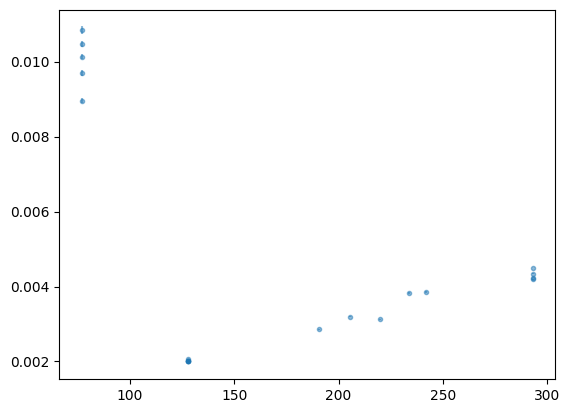

In [202]:
# select only the data of the first peak
# rt peak
ids = list(range(2, 6))

# 77K peak
ids = ids + list(range(6, 12))

# 300K peak
ids = ids + list(range(28, 39))

second_peak_df = clean_df[clean_df['id'].astype(int).isin(ids)]
display(second_peak_df)
T = second_peak_df['temp']
tau = second_peak_df['tau_val']
std = second_peak_df['tau_std']
plt.errorbar(T, tau, yerr=std, linestyle = '', marker = '.',  alpha = 0.5)
plt.show()